# Scaling of Numerical data:

### Description : Different methods of Scaling Data.
### Refernces : www.kaggle.com
### Link : (https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing)  (https://www.oreilly.com/library/view/machine-learning-with/9781491989371/ch04.html)  


## The techniques that we'll cover are the following:

* MinMax Scaler
* Standard Scaler
* Normalizer
* Robust Scaler

## Import libraries :

In [3]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(34)


## About Data :
we created four distributions with different characteristics. The distributions are:

    beta — with negative skew
    exponential — with positive skew
    normal_p — normal, platykurtic
    normal_l — normal, leptokurtic
    bimodal — bimodal
    Then added a fifth distribution with much larger values (normally distributed) — normal_big.


### Original Distributions

In [5]:
# Let's make several types of random distributions.
#create columns of various distributions
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

# make bimodal distribution
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

# create list of column names to use later
col_names = list(df.columns)

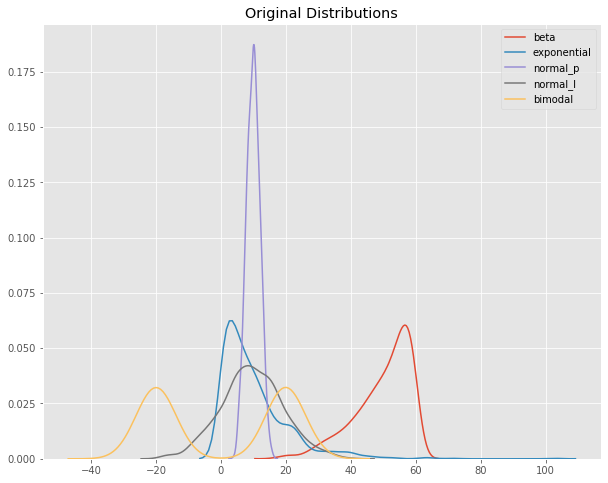

In [6]:
# Let's plot our original distributions
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1);

In [7]:
df.head()


,beta,exponential,normal_p,normal_l,bimodal
0,45.628568,1.634608,5.425200,9.143195,19.488916
1,54.152192,0.954967,10.277619,13.886226,21.781271
2,59.217162,9.550672,8.494060,14.719057,18.341421
3,41.985249,6.532664,10.370148,9.168077,19.272066
4,33.847876,8.233055,11.683360,10.006044,17.365463


In [8]:
df.mean()

beta           49.885940
exponential    10.360224
normal_p        9.935418
normal_l        9.622548
bimodal        -0.004215
dtype: float64

In [9]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.885940,10.360224,9.935418,9.622548,-0.004215
std,8.639417,10.524682,2.048727,9.521573,20.223368
min,17.301655,0.003505,4.037921,-17.585506,-30.940958
25%,45.127889,2.945417,8.472893,3.746189,-19.958142
50%,52.123208,7.343088,9.966971,9.399886,-0.193838
75%,56.736274,14.003676,11.369509,15.647645,19.892955
max,59.998953,102.674010,15.747335,40.144290,29.544748


###  Add a feature with much larger values

In [10]:
# This feature could be home prices, for example.
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big

In [11]:
col_names.append('normal_big')


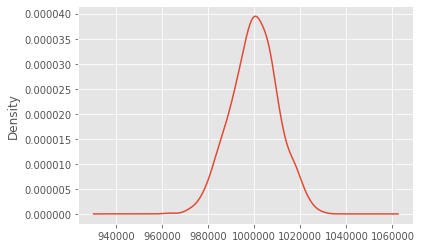

In [12]:
df['normal_big'].plot(kind='kde')

In [13]:
df.normal_big.mean()

1000061.2853929829

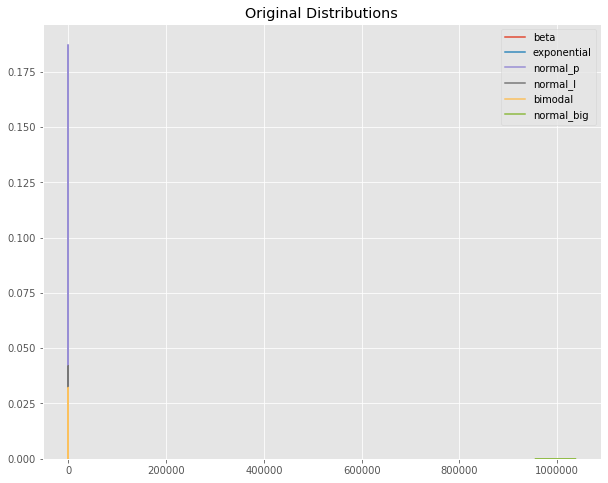

In [15]:
# We've got a normalish distribution with a mean near 1,000,0000.
# If we put this on the same plot as the original distributions, you can't even see the earlier columns.

# plot original distribution plot with larger value feature
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax1)
sns.kdeplot(df['exponential'], ax=ax1)
sns.kdeplot(df['normal_p'], ax=ax1)
sns.kdeplot(df['normal_l'], ax=ax1)
sns.kdeplot(df['bimodal'], ax=ax1)
sns.kdeplot(df['normal_big'], ax=ax1)

In [16]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,49.885940,10.360224,9.935418,9.622548,-0.004215,1.000061e+06
std,8.639417,10.524682,2.048727,9.521573,20.223368,1.018323e+04
min,17.301655,0.003505,4.037921,-17.585506,-30.940958,9.633426e+05
25%,45.127889,2.945417,8.472893,3.746189,-19.958142,9.934342e+05
50%,52.123208,7.343088,9.966971,9.399886,-0.193838,1.000277e+06
75%,56.736274,14.003676,11.369509,15.647645,19.892955,1.006692e+06
max,59.998953,102.674010,15.747335,40.144290,29.544748,1.029405e+06


In [ ]:
# Now let's see what happens when we do some scaling.

# 1) MinMax Scaler :
*  MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.
* MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.
* The default range for the feature returned by MinMaxScaler is 0 to 1.
* formula =>  x (i) ' = (x (i) -min(x)) / max(x)-min(x)


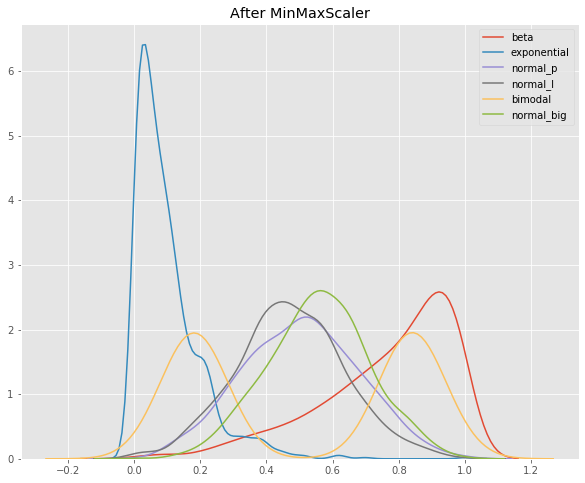

In [18]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1)

 

In [19]:
## Notice how the shape of each distribution remains the same, but now the values are between 0 and 1.

df_mm['beta'].min()

0.0

In [20]:
df_mm['beta'].max()

1.0

In [21]:
# Let's look at the minimums and maximums for each column prior to scaling.
mins = [df[col].min() for col in df.columns]
mins

[17.301654838076082,
 0.0035048186339275127,
 4.037921169337772,
 -17.58550610743862,
 -30.94095789482616,
 963342.6053400572]

In [22]:
maxs = [df[col].max() for col in df.columns]
maxs

[59.99895301718833,
 102.6740104319673,
 15.747335073016503,
 40.14428985165945,
 29.544747966111544,
 1029404.6941373557]

In [23]:
# Let's check the minimums and maximums for each column after MinMaxScaler.
mins = [df_mm[col].min() for col in df_mm.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [24]:
maxs = [df_mm[col].max() for col in df_mm.columns]
maxs

# Looks close enough to 0 to 1 intervals to me. Our feature with much larger values was brought into scale with our other features.

[1.0, 0.9999999999999999, 1.0000000000000002, 1.0, 1.0, 1.0]

# 2) Standard Scaler :
* StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 

* formula => x (i )' = ( x(i) - x ¯) / σ

* StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

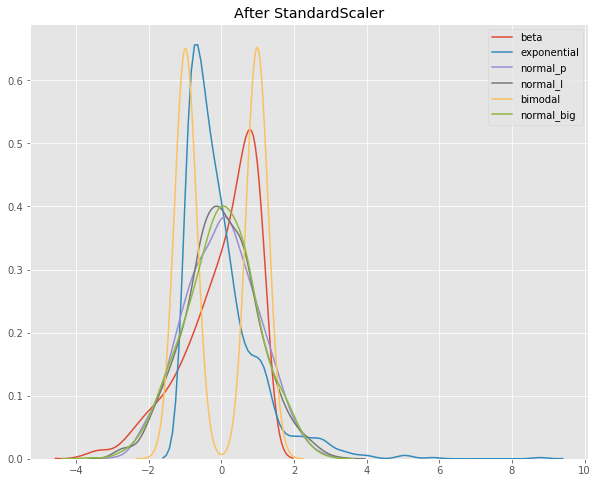

In [25]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
sns.kdeplot(df_s['bimodal'], ax=ax1)
sns.kdeplot(df_s['normal_big'], ax=ax1)

#  We can see that all features now have 0 mean.

In [26]:
# Let's check the minimums and maximums for each column after StandardScaler.
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.773470751579098,
 -0.9845334167059966,
 -2.880055546234317,
 -2.8589464434724436,
 -1.5305177098021956,
 -3.607602320045672]

In [27]:
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.1711523046109418,
 8.77555994726773,
 2.8382629547380707,
 3.207139550003212,
 1.461860768455636,
 2.882983519877846]

In [28]:
# Print mean and standard deviation

print("Mean:", round(df_s.mean()))
print("Standard deviation:", df_s.std())


 

Mean: beta           0.0
exponential   -0.0
normal_p       0.0
normal_l      -0.0
bimodal       -0.0
normal_big     0.0
dtype: float64
Standard deviation: beta           1.0005
exponential    1.0005
normal_p       1.0005
normal_l       1.0005
bimodal        1.0005
normal_big     1.0005
dtype: float64


# 3) Normalizing Observations:
* Rescaling methods (e.g., min-max scaling and standardization) operate on features. Normalizer works on the rows, not the columns.Normalizer does transform all the features to values between -1 and 1 
* Normalizer rescales the values on individual observations to have unit norm (the sum of their lengths is 1). This type of rescaling is often used when we have many equivalent features (e.g., text classification when every word or n-word group is a feature).
*  It can use l2 or l1 normalization.
* By default, L2 normalization is applied to each observation so the that the values in a row have a unit norm. Unit norm with L2 means that if each element were squared and summed, the total would equal 1. Alternatively, L1 (aka taxicab or Manhattan) normalization can be applied instead of L2 normalization.

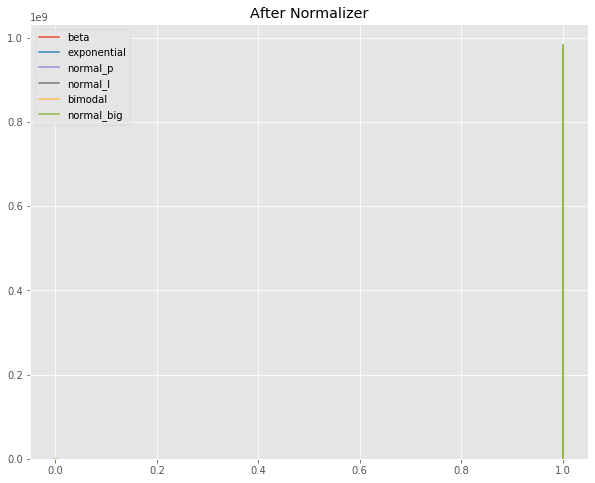

In [30]:
#  It applies l2 normalization by default.
n_scaler = preprocessing.Normalizer()
df_n = n_scaler.fit_transform(df)

df_n = pd.DataFrame(df_n, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Normalizer')

sns.kdeplot(df_n['beta'], ax=ax1)
sns.kdeplot(df_n['exponential'], ax=ax1)
sns.kdeplot(df_n['normal_p'], ax=ax1)
sns.kdeplot(df_n['normal_l'], ax=ax1)
sns.kdeplot(df_n['bimodal'], ax=ax1)
sns.kdeplot(df_n['normal_big'], ax=ax1)

* NOTE : Many rescaling methods (e.g., min-max scaling and standardization) operate on features; however, we can also rescale across individual observations. Normalizer rescales the values on individual observations to have unit norm (the sum of their lengths is 1). This type of rescaling is often used when we have many equivalent features (e.g., text classification when every word or n-word group is a feature).

In [31]:
# Let's check the minimums and maximums for each column after scaling.
mins = [df_n[col].min() for col in df_n.columns]
mins

[1.6962106239343577e-05,
 3.4991458923913307e-09,
 3.9845540457527726e-06,
 -1.753041312693419e-05,
 -3.130673103727043e-05,
 0.9999999929854103]

In [32]:
maxs = [df_n[col].max() for col in df_n.columns]
maxs

# Normalizer also moved the features to similar scales. Notice that the range for our much larger feature's values is now extremely small and clustered around .9999999999

[6.0922551314128685e-05,
 0.00010296229054589482,
 1.6039334990014996e-05,
 4.0188242325050775e-05,
 2.960805022085639e-05,
 0.9999999996471363]

# 4) Robust Scaler :
* If our data has significant outliers, it can negatively impact our standardization by affecting the feature’s mean and variance. Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.
* RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).

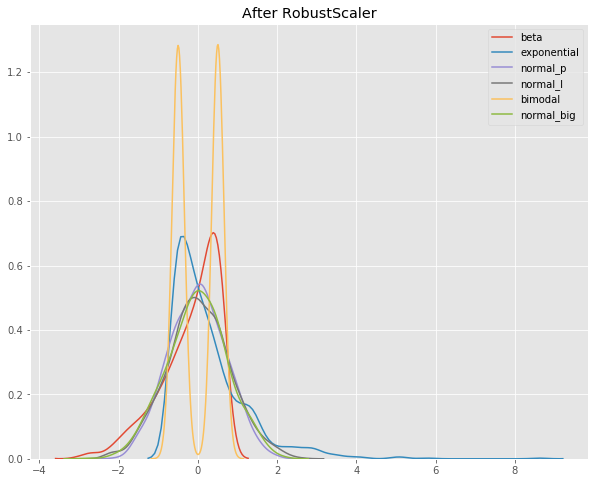

In [34]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
sns.kdeplot(df_r['bimodal'], ax=ax1)
sns.kdeplot(df_r['normal_big'], ax=ax1)

In [35]:
# Let's check the minimums and maximums for each column after RobustScaler.
mins = [df_r[col].min() for col in df_r.columns]
mins

[-2.999689618878111,
 -0.6637195535011039,
 -2.046887842442953,
 -2.2674026011154944,
 -0.7715501559371675,
 -2.7858065094047277]

In [36]:
maxs = [df_r[col].max() for col in df_r.columns]
maxs

#Although the range of values for each feature is much smaller than for the original features, it's larger and varies more than for MinMaxScaler. 
# The bimodal distribution values are now compressed into two small groups.

[0.6784530454288473,
 8.620789141291196,
 1.995557226690652,
 2.5832472111988602,
 0.7462425842409337,
 2.1969738017166156]

## Combined Plot

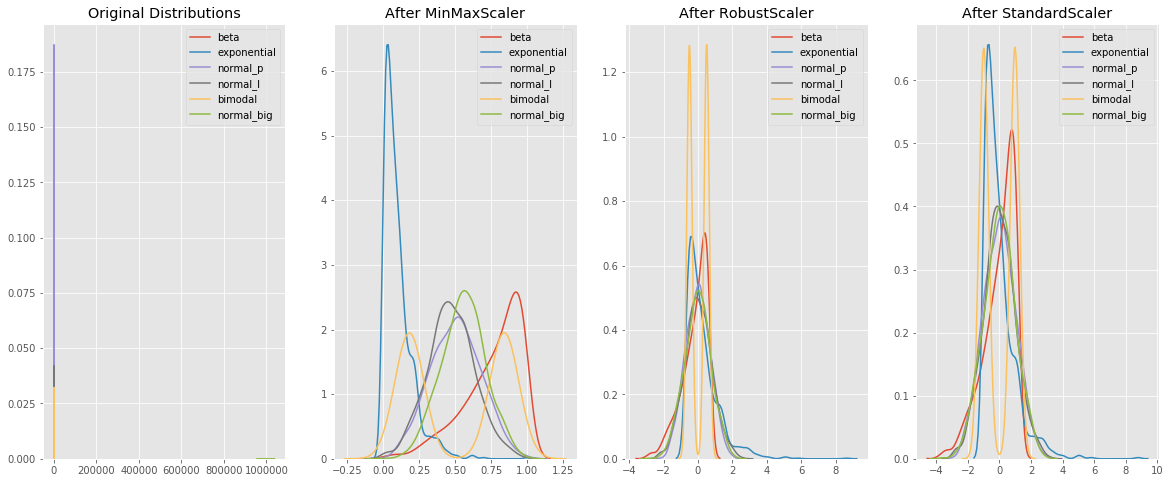

In [37]:
# Combined plot.

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 8))


ax0.set_title('Original Distributions')

sns.kdeplot(df['beta'], ax=ax0)
sns.kdeplot(df['exponential'], ax=ax0)
sns.kdeplot(df['normal_p'], ax=ax0)
sns.kdeplot(df['normal_l'], ax=ax0)
sns.kdeplot(df['bimodal'], ax=ax0)
sns.kdeplot(df['normal_big'], ax=ax0)


ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1)
sns.kdeplot(df_mm['normal_big'], ax=ax1)


ax2.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax2)
sns.kdeplot(df_r['exponential'], ax=ax2)
sns.kdeplot(df_r['normal_p'], ax=ax2)
sns.kdeplot(df_r['normal_l'], ax=ax2)
sns.kdeplot(df_r['bimodal'], ax=ax2)
sns.kdeplot(df_r['normal_big'], ax=ax2)


ax3.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax3)
sns.kdeplot(df_s['exponential'], ax=ax3)
sns.kdeplot(df_s['normal_p'], ax=ax3)
sns.kdeplot(df_s['normal_l'], ax=ax3)
sns.kdeplot(df_s['bimodal'], ax=ax3)
sns.kdeplot(df_s['normal_big'], ax=ax3)

* We can see that after any transformation the distributions are on a similar scale. Also notice that MinMaxScaler doesn't distort the distances between the values in each feature.

# Summary :

## Why Data Normalization/Scaling is necessary for Machine Learning models:
* Many machine learning algorithms, such as neural networks, regression-based algorithms, K-nearest neighbors, support vector machines with radial bias kernel functions, principal components analysis, and algorithms using linear discriminant analysis don't perform as well if the features are not on relatively similar scales.Sometimes we'll want a more normally distributed distribution.
 
* Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

* For example, consider a data set containing two features, age(x1), and income(x2). Where age ranges from 0–100, while income ranges from 0–20,000 and higher. Income is about 1,000 times larger than age and ranges from 20,000–500,000. So, these two features are in very different ranges,If we want to compare these two feature wih each other we need to make a common scale.

## NOTE:
* Use MinMaxScaler as the default if you are transforming a feature. It’s non-distorting.
* We could use RobustScaler if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead.
* Use StandardScaler if you need a relatively normal distribution.
* Use Normalizer sparingly — it normalizes sample rows, not feature columns. It can use l2 or l1 normalization.
### Standardisation and Mean Normalization can be used for algorithms that assumes zero centric data like Principal Component Analysis(PCA).where we are interested in the components that maximize the variance.
### Min-Max Scaling produces values of range [0,1]. When dealing with features with hard boundaries this is quite useful. For example, when dealing with image data, the colors can range from only 0 to 255.

## Where Feature Scaling matters :
1. K-Means uses the Euclidean distance measure here feature scaling matters.
2. K-Nearest-Neighbours also require feature scaling.
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required.
4. Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

* Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.In Short, any Algorithm which is Not Distance based is Not affected by Feature Scaling.